In [53]:
import pandas as pd
from matplotlib.pyplot import plot
import numpy as np
df = pd.read_csv('hw15.csv').set_index('Unnamed: 0')
df.head()

,x1,x2,x3,x4,x5,x6,F
Unnamed: 0,,,,,,,
0,-4.407233,-1.004943,3.369738,-6.827384,-7.607400,-6.125045,-102.401939
1,8.949592,-7.201886,-1.811135,-9.057689,-4.472579,-3.382036,-25.237851
2,7.900306,2.491849,1.203908,-7.841058,9.237987,-9.623759,94.002931
3,9.048100,-0.539456,-2.939854,-5.394851,6.264888,-6.808388,96.001432
4,8.092848,-9.487035,-9.409026,7.772432,1.318238,9.242734,52.372801


In [4]:
def f(koefs, variables):
    s = 0
    for i in range(len(koefs)):
        s += koefs[i] * variables[i]
    return s

def error(f, koefs, variables, F_true):
    F_pred = f(koefs, variables)
    return (F_pred - F_true) ** 2

In [5]:
def d_error(f, koefs, variables, F_true):
    derivatives = []
    delta = 0.001
    f1 = error(f, koefs, variables, F_true)
    for i in range(len(koefs)):
        new_koefs = list(koefs)
        new_koefs[i] += delta
        f2 = error(f, new_koefs, variables, F_true)
        derivatives.append((f2 - f1) / delta)
    return derivatives

In [69]:
def gradient_descent(f, X, y, iter_count, lr=0.001):    
    a4_list = []
    koefs = [1] * X.shape[1]                     
    for i in range(iter_count):
        derivatives = d_error(f, koefs, X[i, :], y[i])
        for j in range(len(koefs)):
            koefs[j] -= lr * derivatives[j]
        a4_list.append(koefs[3])
        print(koefs)
    return koefs, a4_list

[1.7033721200796208, 1.1603872541927558, 0.46218064291224437, 2.0895993935209844, 2.2140781167190653, 1.9775156895548207]
[1.7789933982526556, 1.0994172325893388, 0.44685762358568937, 2.012901629811516, 2.1762261828725578, 1.9488968307933199]
[3.2184586879916743, 1.553454937094365, 0.6662222020884805, 0.5841080421205547, 3.8594097184113316, 0.1952432682710885]
[4.122803403288376, 1.4995318561389368, 0.3723527252539647, 0.04482247126454553, 4.485593774145361, -0.48535333572040074]
[4.688617318613328, 0.8360761358581286, -0.28564685846111715, 0.588236905618281, 4.57776774454938, 0.16084460654342436]
[5.859284307193125, 1.8355628465970213, 0.2893239692915053, -0.27465467660179144, 4.504166900335765, -0.9432495175046363]
[7.735828607459812, 2.9009732564891593, -2.1313683821569462, -0.20002511086452301, 2.3565262645397134, -0.9124499836220359]
[7.685799688375173, 2.9282463467753814, -2.207066934504997, -0.2971633942781935, 2.2632905436974333, -0.9991979096326737]
[7.565085220139824, 2.97441

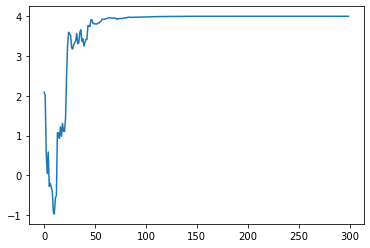

In [79]:
X = np.array(df.drop('F', axis=1))    
y = np.array(df['F'])
gd = gradient_descent(f, X[:], y[:], iter_count=300)#learning rate=0.001
#we need only about 300 iteration count to find our parameters with lr = 0.001
plot(range(len(gd[1])), gd[1])

[1.0703372120079622, 1.0160387254192755, 0.9462180642912245, 1.1089599393520984, 1.1214078116719066, 1.097751568955482]
[1.057776548337705, 1.0261348683095355, 0.9487580255436797, 1.1216560048317077, 1.127679028134066, 1.102494051850241]
[1.2014525403156484, 1.0714533082199784, 0.9706532569373622, 0.979045154192714, 1.2956810373035703, 0.927458250291071]
[1.3680038620341919, 1.0615228397041654, 0.9165348810812021, 0.8797325886951838, 1.4110026100900948, 0.8021232484057839]
[1.439027666318947, 0.9782468027718358, 0.833943672072519, 0.9479446340659577, 1.4225725218191836, 0.883237530739317]
[1.6109638652815592, 1.1250412222153763, 0.9183888375875086, 0.821216446858294, 1.4117630028613528, 0.7210859907136558]
[1.820093876314826, 1.2437748888765134, 0.648618631272575, 0.8295334550901187, 1.172422500015109, 0.7245184099607661]
[1.8087967863643912, 1.2499352879237255, 0.631526735045182, 0.8076025085877986, 1.1513723214221168, 0.7049325177010678]
[1.7961597887854823, 1.2547683260531106, 0.609

[7.997469556314342, 8.997511780139634, -5.998864622714924, 3.9990081551026546, 2.9981983834190147, -2.001004609014869]
[7.997481606637743, 8.997500553617861, -5.998860087659991, 3.998997371564335, 2.9982079192962967, -2.001018226508882]
[7.997480019649901, 8.997501265781372, -5.9988619259754, 3.998991581387596, 2.9982080003595737, -2.0010193501069105]
[7.997466723634104, 8.997537416369184, -5.998876656786553, 3.998970320745948, 2.998241153324341, -2.00106797676448]
[7.997465381539631, 8.99753673303932, -5.998876221792598, 3.9989722473268396, 2.9982373108646745, -2.0010754928846244]
[7.997469157538036, 8.997547869091072, -5.99885927914631, 3.998988266417945, 2.9982472900814496, -2.0010536803267933]
[7.997537472692079, 8.99758252827157, -5.998928256490293, 3.9990475632653766, 2.9982686326597356, -2.001105358475539]
[7.997631196987177, 8.99765468449601, -5.998974968906243, 3.9989471081117722, 2.9983279836706216, -2.001003751734662]
[7.997605762525051, 8.997664825745675, -5.998999056719620

[7.999455968410899, 8.999457519259881, -6.000445055232007, 3.9995071029281575, 2.9994228293084464, -2.0006229824890887]
[7.999439254231225, 8.999458836357821, -6.000460838663081, 3.9995090928973775, 2.9994240264986227, -2.0006212947901343]
[7.999438871663731, 8.999457712011482, -6.0004658383626515, 3.999508605974223, 2.999423431641784, -2.0006233879610016]
[7.999429504161345, 8.999459903799234, -6.00046334821325, 3.99951073259175, 2.9994136434921477, -2.0006211188636227]
[7.999436967014808, 8.999470533884718, -6.000454070209315, 3.9995153125713343, 2.9993969526249473, -2.000614092313369]
[7.999439405802394, 8.999466865993474, -6.000457772185383, 3.999518195258947, 2.9993980703056984, -2.0006269029285457]
[7.99943689616201, 8.999463233962041, -6.000461858199917, 3.999504631845944, 2.9993983938366453, -2.0006354421792856]
[7.999436691017484, 8.999467511480406, -6.0004571025186255, 3.9995017819883336, 2.9993875996780246, -2.000632497379547]
[7.999445003008088, 8.999475870597745, -6.000479

[7.99952376765467, 8.999708739903802, -6.000471991579482, 3.999508231294313, 2.9995013845884104, -2.0004218276720898]
[7.999516934331925, 8.999692249241171, -6.000473151039242, 3.999508346520914, 2.999495200751234, -2.000422094866869]
[7.999515576666634, 8.99969220621664, -6.000473039194803, 3.9995079985668323, 2.9994921778185013, -2.000427270075476]
[7.999495833043301, 8.999704307481748, -6.000461029467125, 3.9995159045605924, 2.999504255563666, -2.0004251033502056]
[7.999492243584406, 8.999703444732697, -6.0004624201831485, 3.9995118205384443, 2.9994959613405423, -2.000425152943006]
[7.99949276723248, 8.99970164829945, -6.00046200879885, 3.9995106334753117, 2.9994853507544526, -2.00042823522184]
[7.999494738868045, 8.999701741111826, -6.00045974976939, 3.9995013035630644, 2.9994822087967274, -2.000426143657488]
[7.99950463875525, 8.999710680672855, -6.000455968757276, 3.9995119136321677, 2.999475457847171, -2.00041577180971]
[7.999523509359511, 8.999714372033813, -6.000436501941895, 

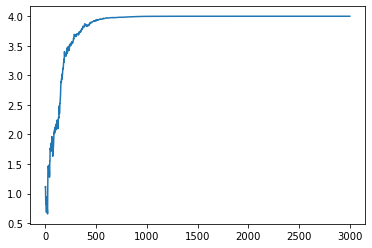

In [80]:
gd = gradient_descent(f, X[:], y[:], iter_count=3000,lr=0.0001)#learning rate=0.0001
#we need only about 3000 iteration count to find our parameters with lr = 0.0001
plot(range(len(gd[1])), gd[1])

[1.0070337212007963, 1.0016038725419276, 0.9946218064291225, 1.0108959939352098, 1.0121407811671908, 1.0097751568955482]
[1.005576426918895, 1.0027754182814592, 0.9949165251862192, 1.0123692589016764, 1.0128684669118755, 1.0103254488727333]
[1.019901636384464, 1.0072938920540278, 0.9970995886602774, 0.9981502456722637, 1.0296191006571442, 0.9928735057771308]
[1.037262722583153, 1.0062587555388076, 0.9914583767473792, 0.9877980701878414, 1.0416400592068547, 0.9798087991887195]
[1.0445046202225905, 0.9977675994472237, 0.9830370482917548, 0.9947532681046573, 1.042819776242384, 0.9880795681787954]
[1.0623813610923873, 1.013030267285202, 0.9918170663601464, 0.9815769866441837, 1.0416958791571123, 0.9712202287448731]
[1.083610595356525, 1.0250831733338681, 0.9644321421814144, 0.9824212635859362, 1.0173999348186298, 0.9715686608152232]
[1.0823784665514755, 1.0257550768172523, 0.962568008970496, 0.9800293707865955, 1.0151041004641008, 0.9694325251017509]
[1.0811116362945823, 1.026239578079757,

[4.708354479145664, 5.220911002080929, -2.6865349087949615, 2.6198706923916775, 2.038014078802681, -0.8400976849415002]
[4.717011538950506, 5.220223083890869, -2.6925932751674426, 2.615898192279555, 2.0448471347144195, -0.8385283536582693]
[4.717661852168149, 5.22945858629777, -2.6915250854145425, 2.6134242484030796, 2.0476047959769685, -0.847253401886067]
[4.715435750751593, 5.231984246096187, -2.696076421890376, 2.6100757556721734, 2.049447732493552, -0.8444950104816615]
[4.717390841175008, 5.231796927122019, -2.6955443293225367, 2.608052883850761, 2.0496219426259366, -0.8459998368267517]
[4.725175068454502, 5.2309149102635555, -2.693673042422366, 2.6135066206970587, 2.0506533173675217, -0.8526930166463077]
[4.735562034275073, 5.225233340565165, -2.702369396089112, 2.622919860973899, 2.059144905563169, -0.8487505182919765]
[4.7406157435108085, 5.232783198029608, -2.7012981341946634, 2.624101879380513, 2.0652316421654295, -0.8406916423084746]
[4.740514672930797, 5.23379866369186, -2.7

[6.129389916905788, 6.819707441711493, -3.998159493565646, 3.213471627431467, 2.4364752410044854, -1.4249156453444158]
[6.13073148234442, 6.8185433960345385, -3.9985534301887453, 3.215110849664732, 2.4388616297194083, -1.4251595294829364]
[6.131985498956236, 6.817616019683227, -3.998972920279715, 3.214219322675919, 2.439656434786138, -1.4258239713101721]
[6.131260258336098, 6.817726425738451, -4.000362417457184, 3.2159461261347224, 2.4384172385125047, -1.4251613800960006]
[6.132066477198523, 6.816598235575587, -4.0009699444835505, 3.2158685202002006, 2.4390887868482274, -1.4255469612264113]
[6.13158523301355, 6.816105861175216, -4.0034706077505104, 3.2181282672069202, 2.439140127680202, -1.4264812691485804]
[6.133351995785506, 6.817748995245384, -4.006513310737876, 3.2217799810893544, 2.444923864702086, -1.4313423606678226]
[6.130080040469585, 6.81897028055502, -4.010361317470764, 3.2233030125794024, 2.4483217200308163, -1.4322418641293877]
[6.130997257482444, 6.824313291753019, -4.012

[6.883895902345357, 7.728308519246527, -4.781537620851269, 3.5806628067200514, 2.678276282039157, -1.7031761436194974]
[6.8846222362387985, 7.728253057842472, -4.78136000622454, 3.5799290534207096, 2.678360790583619, -1.703405382403471]
[6.886937293582649, 7.726883844249696, -4.7839599044227015, 3.5795870010497586, 2.6804384840935414, -1.7061318399058816]
[6.886364640370246, 7.727096220471858, -4.784709590454681, 3.5793466438511867, 2.6808682565276687, -1.7053442376869488]
[6.886414064044391, 7.7262678007023275, -4.785733909356487, 3.578957102571927, 2.6814891393518603, -1.7062476749309805]
[6.884991042115114, 7.726680456406966, -4.788036100968637, 3.580086744013467, 2.6828867191474757, -1.7068073457181758]
[6.885161721097303, 7.726367314097664, -4.788361213696025, 3.5800126271768002, 2.6825504701303866, -1.7068691287905169]
[6.885664168513156, 7.726704982877762, -4.788043046923079, 3.5795288025779337, 2.6826314394419435, -1.7065353562919374]
[6.886226135161708, 7.727880961238661, -4.7

[7.388106243012576, 8.3095258265185, -5.307180738733829, 3.7957358167440747, 2.82535583362907, -1.8028186170075673]
[7.387053602661595, 8.310713239986987, -5.308070031317374, 3.7966764154574264, 2.8250856244497387, -1.802724749081104]
[7.3865456969013, 8.311841705171924, -5.308549226538234, 3.796835791840957, 2.824618766204924, -1.8021744587585196]
[7.386377037743953, 8.312865825657603, -5.3084127770700595, 3.7972401472841684, 2.823592054504625, -1.8031635617513542]
[7.386361171180595, 8.31289280947223, -5.308407725552662, 3.797251286178341, 2.823601220569128, -1.8031229978059082]
[7.387158659015905, 8.312819488887074, -5.30848947096769, 3.7972921875463803, 2.8243943415489614, -1.8027974397620368]
[7.388058584521037, 8.31224568505695, -5.308756946021246, 3.797882221591469, 2.825081449237101, -1.8022953643566566]
[7.387942401547099, 8.312253883676304, -5.3088312570397544, 3.7981163117735566, 2.8250326033149515, -1.8023645291962298]
[7.3890071541912485, 8.311498435416587, -5.309513763849

[7.670588768173044, 8.63409541176979, -5.633860185642192, 3.871742614906961, 2.9080025616397283, -1.89944059534541]
[7.67012361084114, 8.634489130634732, -5.634295984125926, 3.8717588224503854, 2.908501214226233, -1.9000204270371945]
[7.670165989075009, 8.635144162546222, -5.634523435000455, 3.8720131082035185, 2.9079781979686112, -1.900377276591918]
[7.670124596684362, 8.635316662725588, -5.634402769252886, 3.87217755700009, 2.9077650679416776, -1.9006246884532931]
[7.670943002641001, 8.636258867029321, -5.63498881359383, 3.8723460694023624, 2.907533021694234, -1.9012991964435513]
[7.67144419555121, 8.636535163918152, -5.634536894410639, 3.8725913065762283, 2.907885153343257, -1.9009278424902911]
[7.671592264691571, 8.636499051098436, -5.635069363598039, 3.8724996145727415, 2.9084302159799713, -1.9004372617786758]
[7.6715727111260605, 8.63661823702366, -5.635183453925053, 3.8722815500354595, 2.908374820903747, -1.9004358371473302]
[7.67170759371589, 8.636601676273509, -5.6351500362399

[7.808081283419982, 8.801300533253917, -5.789231668600852, 3.931485130066421, 2.95557476868656, -1.9406824567669596]
[7.808074640410417, 8.801293761390603, -5.789243525970133, 3.9314852631739257, 2.955568136078139, -1.9406923452317077]
[7.808132100175635, 8.80123025348505, -5.789314344478771, 3.9313986530017404, 2.9556515539068675, -1.9406222222935523]
[7.808135136357363, 8.801581029191409, -5.7896883347089485, 3.9310797639205015, 2.9559351151396145, -1.9409368692644986]
[7.808495090634225, 8.801800390783873, -5.789694175215121, 3.9308653496338666, 2.9557384752877733, -1.9413645313056531]
[7.808708761769094, 8.801853898727108, -5.790098833242385, 3.9306113214315035, 2.956154313109399, -1.9419124037901485]
[7.808745459373881, 8.801900197396916, -5.790090309550832, 3.930515818837461, 2.95627156792089, -1.9418662135533993]
[7.809353462598509, 8.802670822126425, -5.790579344367753, 3.930405964787725, 2.9563337519121573, -1.9426009547762961]
[7.809673712569171, 8.80244183952727, -5.79087151

[7.894008646154897, 8.884076498692107, -5.880250068895269, 3.963503937505724, 2.9737387279382235, -1.9719222208602074]
[7.894004192066582, 8.884084199989484, -5.880246234413178, 3.96349821548864, 2.973740336841354, -1.971926608757053]
[7.893959553725405, 8.884162739969312, -5.88025858108051, 3.9635329282521803, 2.9737541808664187, -1.971891824940015]
[7.8939431155457305, 8.884143139149652, -5.880285034655009, 3.963552135023869, 2.9737603309722402, -1.9719064827781787]
[7.894322177273415, 8.884434025903078, -5.8806627680832415, 3.9631694475436703, 2.973983776375397, -1.9719792972498065]
[7.894549280365798, 8.88464538037531, -5.880465007950151, 3.9634304825601387, 2.9741553471513966, -1.9721244607677835]
[7.894564055814082, 8.88461788146656, -5.880479251861346, 3.9634043992158383, 2.974175867230087, -1.9721474392873397]
[7.89455314290617, 8.884594638999054, -5.8805136893995735, 3.963442575621297, 2.974183215898036, -1.972123172629889]
[7.894644283669075, 8.88482009498257, -5.880653343679

[7.939708217649554, 8.933551328189534, -5.933559821571491, 3.9774294690901075, 2.984941409961956, -1.9835417164028533]
[7.939772001068483, 8.933637396952633, -5.933529155534919, 3.9773927017482595, 2.9848811976347975, -1.9835521845522162]
[7.939780170675139, 8.933659623674632, -5.9335061692483775, 3.9773856079620904, 2.984902660271985, -1.983590984212762]
[7.939810412345188, 8.933629911238627, -5.933556434051985, 3.977409076512214, 2.984863071323961, -1.983535544286602]
[7.939810966121854, 8.933627204728783, -5.933558062977526, 3.977408351298471, 2.984864484596709, -1.9835355693586847]
[7.939824994886332, 8.933614749647425, -5.933612397358346, 3.97745978336629, 2.9848598413303375, -1.983460361395719]
[7.9398256852021145, 8.933612994092709, -5.933611658496924, 3.977465505992154, 2.9848591656803722, -1.9834610020348613]
[7.940041748329645, 8.933618022877784, -5.933814834370348, 3.9774395085372576, 2.984931465580539, -1.9832802668842373]
[7.940007664157949, 8.933609115917799, -5.933891593

[7.965231781876281, 8.960644772286585, -5.964824487163535, 3.9890439780542386, 2.989948109339822, -1.9915002511785656]
[7.9652338176742665, 8.960648486018666, -5.964820535898568, 3.9890393519569076, 2.9899482945325326, -1.991497498739708]
[7.965279646671308, 8.96069861200858, -5.964872251891496, 3.9890670237084884, 2.9898604219134666, -1.9914436040757741]
[7.965319055128959, 8.960810485676177, -5.964889129571202, 3.9890493754564864, 2.9899359093368005, -1.9914137518764201]
[7.96533260597234, 8.96080085185627, -5.964888520314044, 3.9890398846166377, 2.989952024066064, -1.9914194984262585]
[7.965281016033384, 8.960878325663696, -5.964919872834296, 3.9891049848705826, 2.990032664347289, -1.9915082974273726]
[7.965280317460657, 8.960946954339857, -5.964915445656634, 3.989148008073621, 2.990078279790335, -1.991544519946383]
[7.965276573353776, 8.961033113695564, -5.964998684166797, 3.9891098963275637, 2.990127007801524, -1.9914697529858238]
[7.96528076863416, 8.961025548861548, -5.965004684

[7.978458459117288, 8.976267765185652, -5.979475749539203, 3.993864974511363, 2.994300384293494, -1.9942408831093228]
[7.978512904635533, 8.976312134769577, -5.979527631547121, 3.993819443317678, 2.9943642444220235, -1.9942299524810538]
[7.978512865812326, 8.97632243607062, -5.979548048080647, 3.993794513992493, 2.994391202886432, -1.9942256068737916]
[7.978516249856949, 8.976319648524472, -5.979545989083586, 3.993796811670125, 2.9943890546682805, -1.9942300944121316]
[7.978528465256855, 8.976303232957298, -5.979552732913686, 3.993804409364281, 2.994377693383646, -1.9942465870175823]
[7.978529315683777, 8.976302322794462, -5.979552885115367, 3.9938016866203876, 2.994377544217975, -1.9942501364980822]
[7.978503589252869, 8.976333552907548, -5.979565801159034, 3.9938232472211723, 2.9943780323595495, -1.9942871895354302]
[7.978501836478951, 8.976338823244456, -5.979568929441971, 3.993805609384279, 2.9943934924767235, -1.9942936644808689]
[7.978486235552893, 8.976367898941657, -5.979570421

[7.98694788873562, 8.985621792050217, -5.988093445348426, 3.9963915046334995, 2.9963278360027092, -1.996862757877121]
[7.98697950598785, 8.985641972721771, -5.988107120103602, 3.9963677717977126, 2.9963090743306737, -1.9968587708330412]
[7.986985918777438, 8.985653886210363, -5.988095159815477, 3.996369937256567, 2.9963057437560057, -1.996851218475359]
[7.98699536048247, 8.98567658929132, -5.988080260530264, 3.9963930909221705, 2.9962812528031906, -1.9968721098917417]
[7.986994598966911, 8.985679759872989, -5.988076719447632, 3.996398403527967, 2.996284179728753, -1.9968719077684973]
[7.986997339361795, 8.985678557153022, -5.9880823193708395, 3.996398104590315, 2.996291316809615, -1.9968713996478957]
[7.987002527942443, 8.985682855205523, -5.988074532552089, 3.996401923162213, 2.996295526723958, -1.9968675997535552]
[7.987000711581104, 8.985683713806504, -5.988073967246699, 3.996403074033266, 2.996296690084219, -1.9968675960327995]
[7.986998779572639, 8.985698836603932, -5.988077393743

[7.992313527344512, 8.991490543192368, -5.993502749673795, 3.997513781943674, 2.9974401825182615, -1.9980593245587375]
[7.992313302306683, 8.991490913916282, -5.993502931638497, 3.9975150339584116, 2.997438218244025, -1.9980585913171653]
[7.992337998361759, 8.991507347225655, -5.993507900009073, 3.997493826637632, 2.9974487376139236, -1.998077014993588]
[7.992347763096042, 8.99149543833778, -5.993521409198608, 3.9974874184871143, 2.997452543600645, -1.9980872795433484]
[7.992352053665389, 8.991496382054763, -5.993529185775638, 3.9974981627309627, 2.9974493515390366, -1.9980837287054432]
[7.9923662894639, 8.991525936285075, -5.99353850198515, 3.9975204961066377, 2.9974755309364225, -1.9981163970612268]
[7.992381809722804, 8.991546054726575, -5.993568102582933, 3.997535424638417, 2.997463931993867, -1.998091933963773]
[7.992386736607332, 8.991545945230238, -5.993562861311935, 3.9975400562976504, 2.997469576011539, -1.9980913185976725]
[7.992385055869486, 8.991546045638756, -5.99356401286

[7.995276278174229, 8.994843865077334, -5.996355502161797, 3.9984975817588295, 2.998417431950542, -1.9989871967273896]
[7.99528259964359, 8.994853826676817, -5.996373872952107, 3.998513404121804, 2.9984055678935473, -1.9989988331460213]
[7.995279035890481, 8.994856605203369, -5.996376220416305, 3.9985157689554316, 2.998409360162493, -1.9990025695386444]
[7.995280076794431, 8.994859736292948, -5.996381004619323, 3.9985072498287075, 2.9984136858792505, -1.9989992328620523]
[7.995281035424657, 8.994859149594873, -5.996380551500598, 3.9985080249073373, 2.998411907763305, -1.9989988596869197]
[7.995281032593384, 8.994858897096293, -5.996380559287438, 3.9985079381997277, 2.998411166840456, -1.9989988658296416]
[7.995283374613966, 8.994866090668653, -5.9963767935330505, 3.9984995487940274, 2.998411278697932, -1.9990042103683514]
[7.995283160886249, 8.994865910040314, -5.996378121605686, 3.9984997754204947, 2.9984110658085683, -1.9990040245721794]
[7.995285008914549, 8.99486967851305, -5.99638

[7.997290875908924, 8.997020608485997, -5.998044846029134, 3.9989838048211666, 2.999046862526273, -1.9996749106994443]
[7.997295045727397, 8.997017316241557, -5.998049991292045, 3.998985896330113, 2.999044186469181, -1.9996774824418035]
[7.9973010455251075, 8.9970202453165, -5.998054315244228, 3.998989452885238, 2.99905085315187, -1.9996701098298328]
[7.997301262507652, 8.997021777544408, -5.998059006852428, 3.9989924752556822, 2.9990543492239876, -1.9996746942789083]
[7.9973010381242755, 8.997022162763304, -5.998058608951799, 3.99899275100676, 2.9990531723875824, -1.9996750604184539]
[7.997302052874532, 8.997021801330904, -5.998058621101571, 3.998993457355904, 2.999051025552921, -1.999674387385229]
[7.997299908719241, 8.997025202878884, -5.998064674892615, 3.998994327094869, 2.999047512792757, -1.9996725241713316]
[7.997306472371687, 8.997029155583173, -5.998067520214041, 3.998992042626232, 2.999047483028001, -1.999667788380979]
[7.997310053354256, 8.997037346711856, -5.99807506679754

[7.998107567484494, 8.99791908843706, -5.999043786704305, 3.99915760327591, 2.99924077619345, -2.000045716700758]
[7.998106737317082, 8.997918200389387, -5.999043985938643, 3.999157600017345, 2.999240763496387, -2.0000460520380074]
[7.998106431989705, 8.997918317353857, -5.999043999599414, 3.999157046015538, 2.999238937983205, -2.000047028594442]
[7.998108528887309, 8.99792049551798, -5.9990447938997224, 3.999156755926223, 2.999234976716819, -2.000050572476792]
[7.998105984082158, 8.997921932173195, -5.999043750386095, 3.9991579178652112, 2.999236370925882, -2.0000490616632622]
[7.99810473070325, 8.997922165411318, -5.999044297377494, 3.9991584555925273, 2.999236885237541, -2.000051043930495]
[7.998104568715903, 8.997921935335325, -5.999044946410493, 3.999158186380258, 2.999236738176295, -2.000051238373435]
[7.998103925431956, 8.997923594994264, -5.99904690879082, 3.9991591930181523, 2.9992343477809627, -2.0000534432559585]
[7.998104241575265, 8.99792296615606, -5.99904673398423, 3.999

[7.99872433698146, 8.998670126095975, -5.999685664855606, 3.999319105507312, 2.9994425578299047, -2.000266682585458]
[7.998722753920654, 8.998670986974405, -5.999686653290103, 3.9993187642189874, 2.999443305045601, -2.000265900411981]
[7.998723771355734, 8.998671585008523, -5.9996856424218405, 3.9993191730126147, 2.999441193476963, -2.000265700121459]
[7.998723595001899, 8.998671290344225, -5.999685756896997, 3.9993184664027526, 2.999440799490095, -2.000266367736031]
[7.998726365838573, 8.998673218293472, -5.9996873613368935, 3.9993198656563917, 2.9994387631747057, -2.0002670139457592]
[7.998726482776925, 8.998674470368222, -5.999685926721212, 3.9993207443333874, 2.9994402047776916, -2.000268751988276]
[7.998728885185387, 8.998675122415712, -5.999686636279976, 3.999323317194217, 2.999439026950645, -2.0002724949304103]
[7.998729022397872, 8.99867566517712, -5.999685337199984, 3.9993243451170866, 2.9994401735555294, -2.000271451173322]
[7.998728155973812, 8.998675717423883, -5.9996852289

[7.999086138837065, 8.99905133685077, -6.000037788964179, 3.999396990495489, 2.9994600974356675, -2.0003391015736662]
[7.999088844189135, 8.999052657268237, -6.000040206207708, 3.9993993607279967, 2.999460642494144, -2.000338948988096]
[7.999088751108888, 8.999052106287493, -6.000040162946915, 3.999398959651847, 2.9994607301922813, -2.0003389219963634]
[7.999089567592763, 8.999053080276006, -6.000040251193327, 3.999396160481332, 2.9994614481020125, -2.000338353658716]
[7.999090181784778, 8.999053184781266, -6.000039523777916, 3.9993969028712058, 2.9994601648358636, -2.000337644941241]
[7.999092939745731, 8.99905397822609, -6.00004281893334, 3.9993980470913724, 2.999462759873586, -2.0003358364216495]
[7.999094776678075, 8.999055873259042, -6.000041876788268, 3.9993984867993526, 2.99946267284281, -2.000336473076044]
[7.99909604546778, 8.999057071903831, -6.000042668881249, 3.9993962996929446, 2.9994624247579456, -2.0003365011112595]
[7.999095426193154, 8.999057020728012, -6.0000431755054

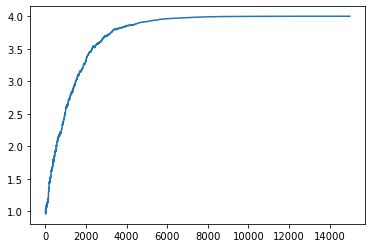

In [81]:
gd = gradient_descent(f, X[:], y[:], iter_count=15000,lr=0.00001)#learning rate=0.00001
#we need only about 15000 iteration count to find our parameters with lr = 0.00001
plot(range(len(gd[1])), gd[1])
print(len(gd[1]))

In [ ]:
a1=8, b1=9, c1=-6, a2=4, b2=3, c2=-2